# Secret-key or symmetric cryptography Exercise || I.BA_MOVK_MM, Semesterweek 03
*Please write down to solution of the exercises in a consise but comprehensible way. Numerical results
should be accurate to 4 digits.*

## 1. DES S-box S$_{3}$

The input to the DES S-box S3 is 110111. What’s the output? Use Wikipedia, google, a book or some other source to ﬁnd the table for S3.

**The first and last bit (here 11) refering to the row index 3 and the middle four bits (here 1011) refering to the column index 11. The output is 0011.**

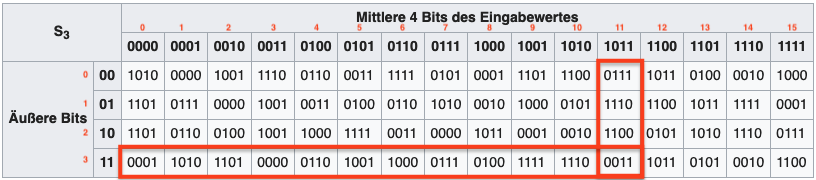
https://de.wikipedia.org/wiki/Data_Encryption_Standard



## 2. 3DES

What is the effective key size of 3DES and why is it not 168 bits?

The effective key length reduces to 112 bit from 168 due to the meet-in-the-middle attack.

## 3. Differences between AES and Rijndeal

What are the differences between the AES candidate Rijndeal and AES with respect to block size, key size and number of rounds?

|					| AES   						| Rijndal   			|
|:-------------------|:-------------------------------|:-----------------------|
|block size			|	128 Bits					|128, 192, 256 bits		|
|key size			| flexible 128, 192 and 256 bits|128, 192, 256 bits		|
|number of rounds	| 10, 12 or 14 rounds			|10, 12, 14 rounds depending on key length|

Note: AES is a substitution-permutation network (SPN).

## 4. AES S-box

If we input the byte 11011101 into the AES S-box, what’s the output? Use the table in slides!

We split 11011101 in half, this gives us 1101 / 1101

1101 = 13 and therefore the output is C1

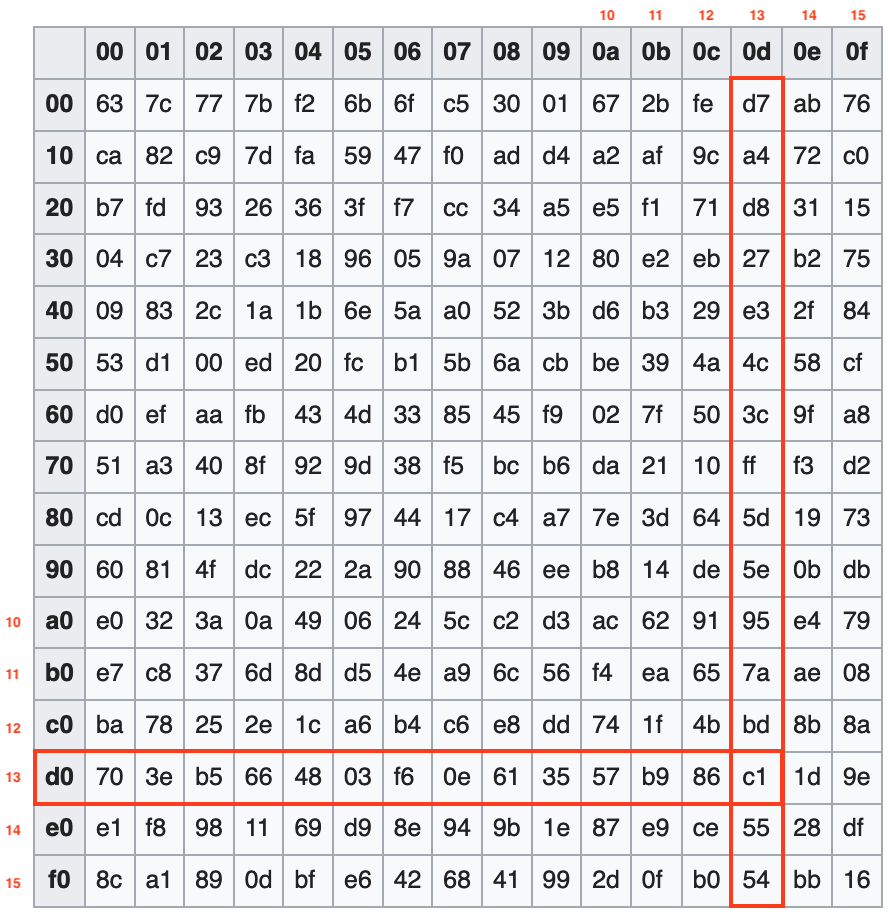
https://en.wikipedia.org/wiki/Rijndael_S-box




## 5. Other Block ciphers

Compare DES, 3DES and AES with other block ciphers like IDEA, Blowﬁsh, Twoﬁsch, RC5, RC6, Serpent and three more of Your choice. Make a table that shows key size, effective key size, block size, number of rounds, relative velocity of a hard- or software implementation.

|				      | DES    | 3DES             | AES             | IDEA     | Blowfish    | Twofish          | RC5         |  RC6             | Serpent           | KLEIN          | TWINE          | Zorro    |
|:------------------- |:-------|:-----------------|:----------------|:---------|:------------|:-----------------|:------------|:-----------------|:------------------|:---------------|:---------------|:---------|
|key size			  | 64bits | 168,112,56 bits  | 256,192,128 bits | 128 bits | 32-448 bits | 256,192,128 bits | 1-2040 bits | 256,192,128 bits | 256,192, 128 bits | 64,80,96 bits  | 80 or 128 bits | 128 bits |    
|block size           | 64bits | 64bits           | 128 bits        | 64 bits  | 64 bits     | 128 bits         | 32, 64 or 128 bits | 128 bits  | 128 bits          | 64 bits        | 64             | 128 bits |   
|number of rounds	  | 16     | 48               | 14, 12 or 10 (depends on key) | 8.5      | 16            | 16                   | 1 - 255            |     20                    | 32                       | 12, 16 or 20     | 36             | 24     |  

## 6. Modes of operation

You should be able to produce sketches of the 5 modes of operation and You should be able to write down the 
equations, relating, IVs (if any), plaintext block, key, ciphertext block, encryption and decryption, XOR. 
You should also understand the inﬂuence of a one-bit error in the ciphertext block.

- ECB (Electronic CodeBook Mode)
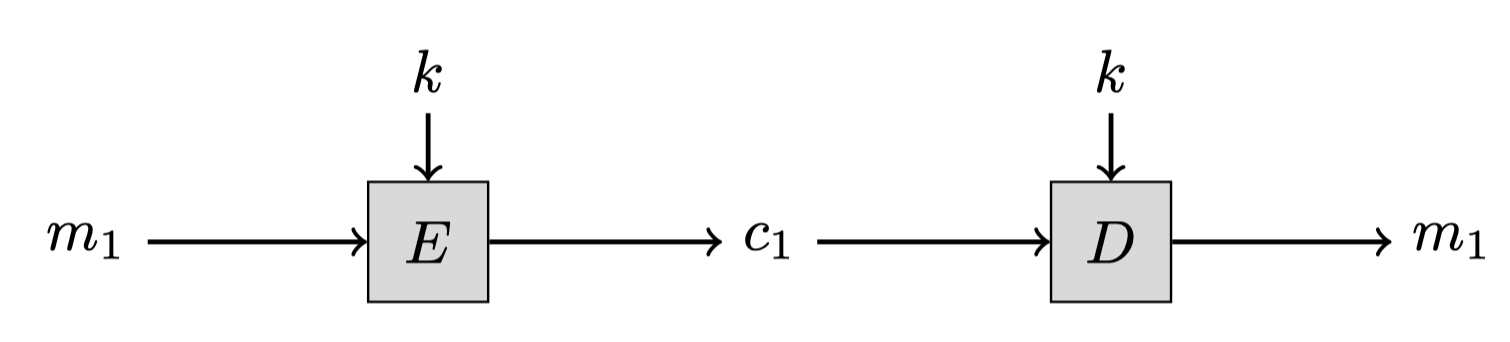

- CBC (CipherBlock Chaining Mode)
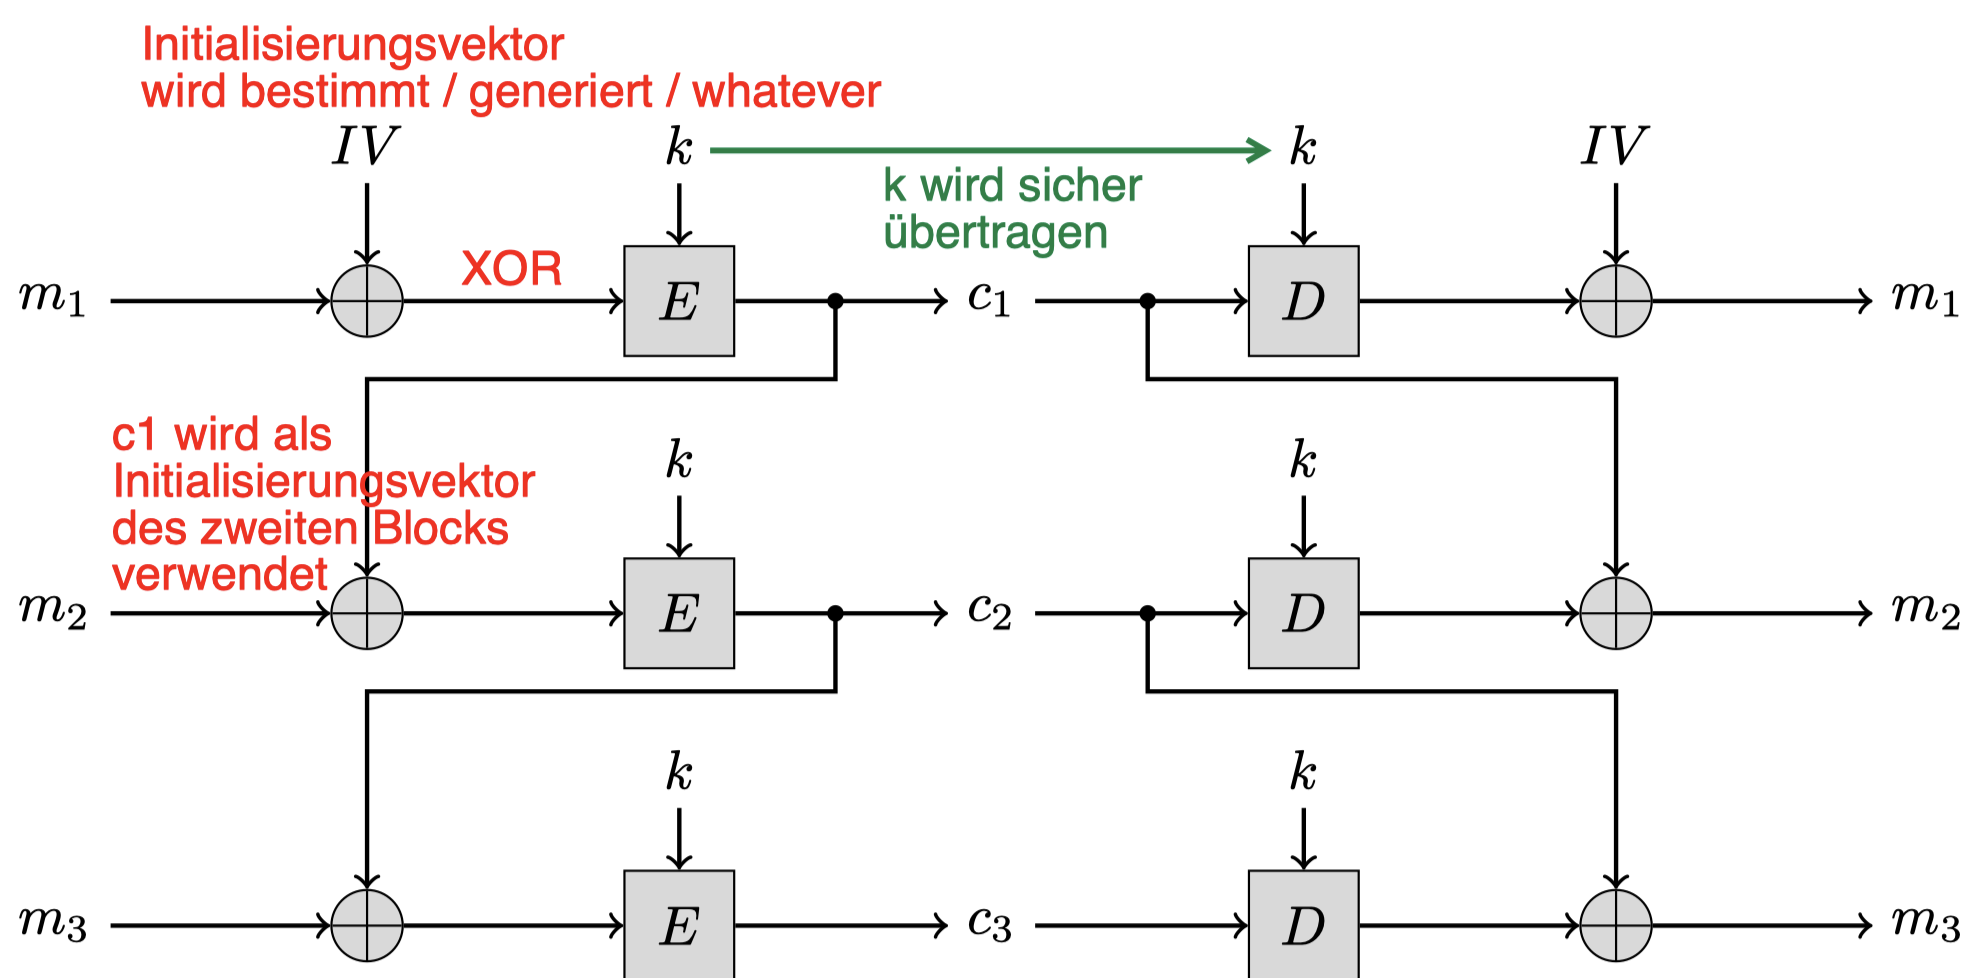

- CFB (Cipher Feedback Mode)
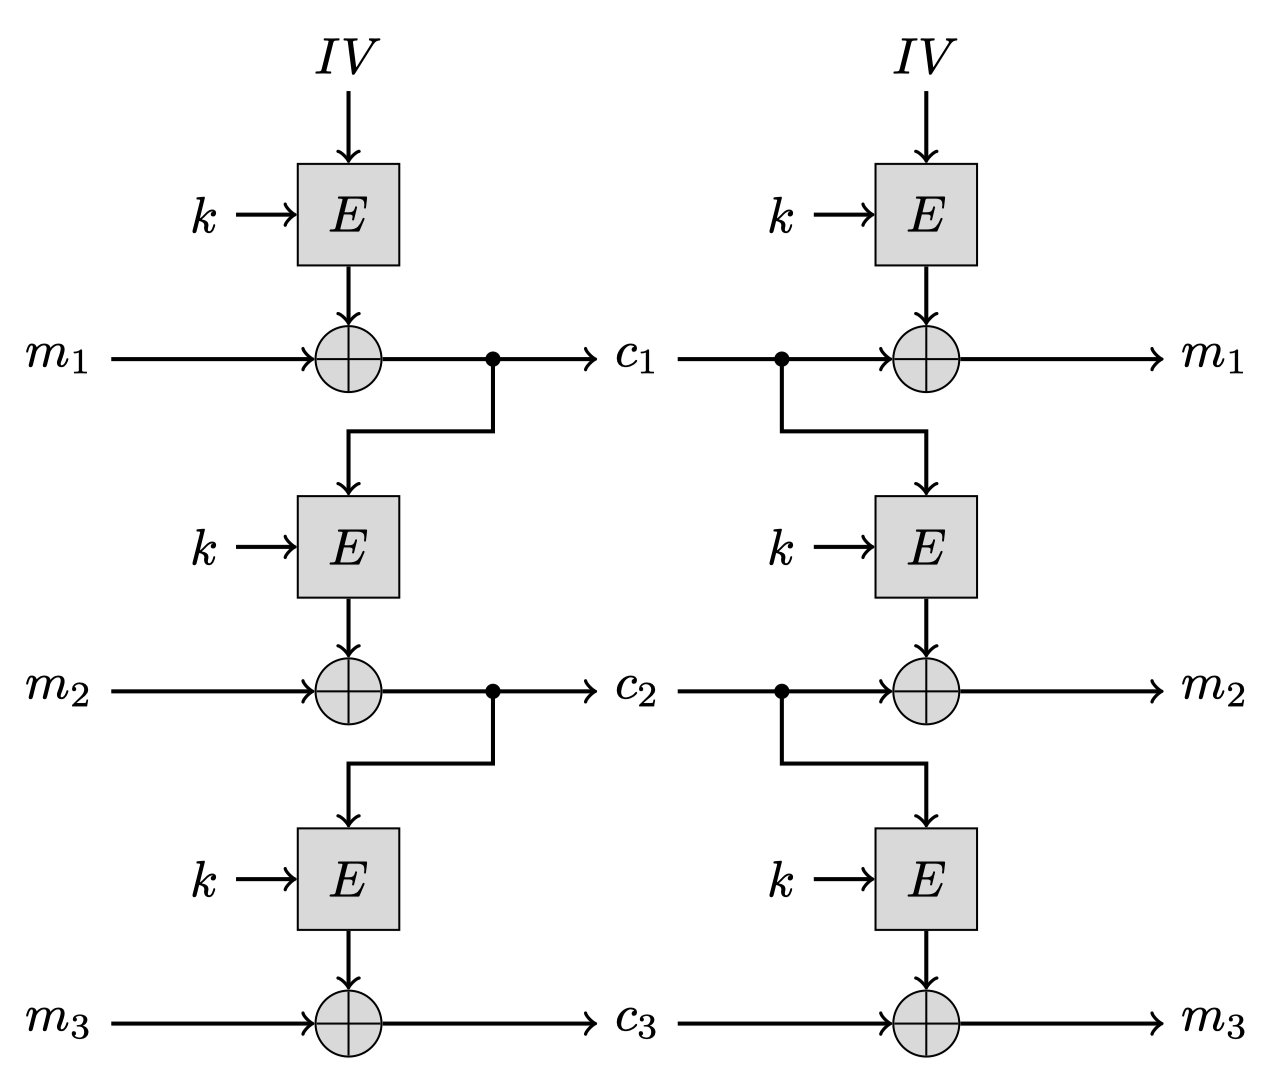

- OFB (Output Feedback Mode)
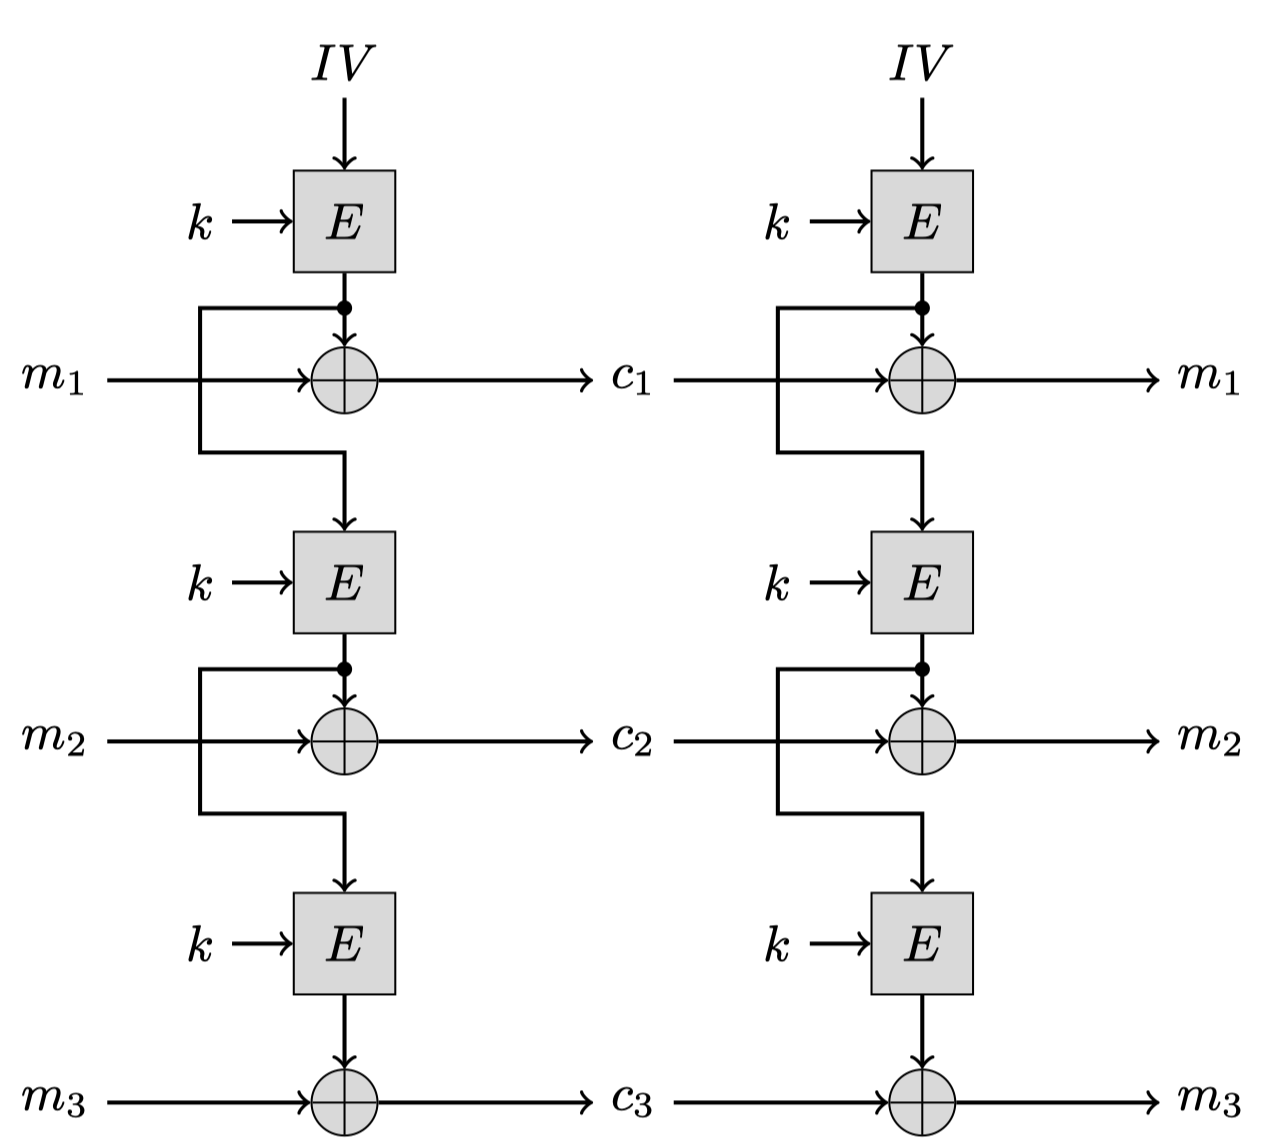

- CTR (Counter Mode)
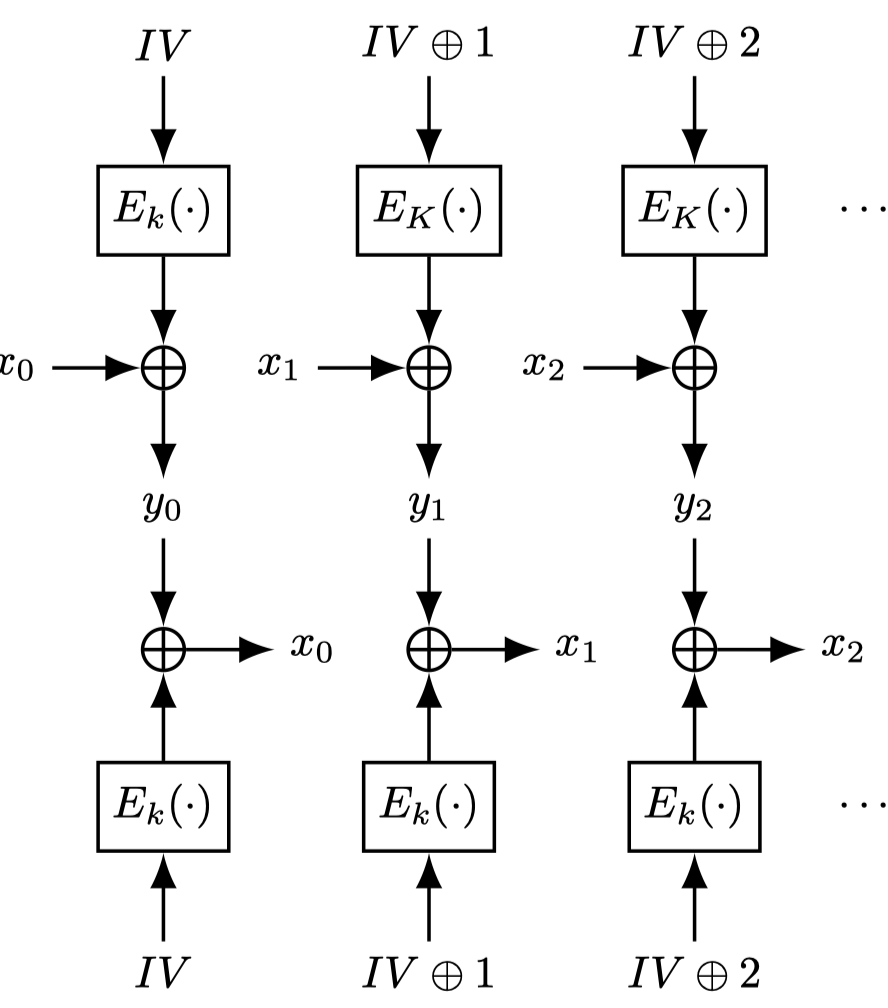

## 7. RC4

Use python in Jupyter Notebook to programm RC4. Do some research on RC4 and ﬁnd out, 
why it should not be used any more! 
Siehe auch Webbrowser: Endgültig Schluss mit RC4 und Der Lange Abschied von RC4.


In [1]:
# Copy-Paste from https://github.com/bozhu/RC4-Python/blob/master/rc4.py and patched for python3

def KSA(key):
    keylength = len(key)

    S = range(256)

    j = 0
    for i in range(256):
        j = (j + S[i] + key[i % keylength]) % 256
        S = list(S)
        S[i], S[j] = S[j], S[i]  # swap

    return S


def PRGA(S):
    i = 0
    j = 0
    while True:
        i = (i + 1) % 256
        j = (j + S[i]) % 256
        S[i], S[j] = S[j], S[i]  # swap

        K = S[(S[i] + S[j]) % 256]
        yield K


def RC4(key):
    S = KSA(key)
    return PRGA(S)


if __name__ == '__main__':
    # test vectors are from http://en.wikipedia.org/wiki/RC4

    # ciphertext should be BBF316E8D940AF0AD3
    key = 'Key'
    plaintext = 'Plaintext'

    # ciphertext should be 1021BF0420
    #key = 'Wiki'
    #plaintext = 'pedia'

    # ciphertext should be 45A01F645FC35B383552544B9BF5
    #key = 'Secret'
    #plaintext = 'Attack at dawn'

    def convert_key(s):
        return [ord(c) for c in s]
    key = convert_key(key)

    keystream = RC4(key)

    import sys
    for c in plaintext:
        sys.stdout.write("%02X" % (ord(c) ^ next(keystream)))
    print

BBF316E8D940AF0AD3

RC4 should not be used anymore because it produces forseen ciphertext on similar plaintext. It is therefore vulnerable for known plaintext-attacks. This is especially easy for attacks while connecting to a network (WPE) because the high standartisation of the exchanged network packets.

## 8. Trivium

Use python in Jupyter Notebook to programm Trivium. This is not an easy task: do it in groups of two! 
Use 0x00000000000000000000000000000000 for the key, IV, and plaintext for initial testing. 
The expected ciphertext for this should be 0xFBE0BF265859051B517A2E4E239FC97F. In the algorithm on slide “Trivium — Initialization”, the + represents XOR (which in python is “^”), · represents logical AND (which in python is “&”). The key-stream is

z$_{i}$ =t$_{1}$+t$_{2}$+t$_{3}$

and the ith byte of the ciphertext c$_{i}$ of the plaintext m$_{i}$ is 

c$_{i}$ = z$_{i}$ ⊕ m$_{i}$ 

The following site https://asecuritysite.com/encryption/trivium might be of some help!


In [18]:
from collections import deque
from itertools import repeat
from sys import version_info


class Trivium:
    def __init__(self, key, iv):
        """in the beginning we need to transform the key as well as the IV.
        Afterwards we initialize the state."""
        self.state = None
        self.counter = 0
        self.key = key  # self._setLength(key)
        self.iv = iv  # self._setLength(iv)

        # Initialize state
        # len 100
        init_list = list(map(int, list(self.key)))
        init_list += list(repeat(0, 20))
        # len 84
        init_list += list(map(int, list(self.iv)))
        init_list += list(repeat(0, 4))
        # len 111
        init_list += list(repeat(0, 108))
        init_list += list([1, 1, 1])
        self.state = deque(init_list)

        # Do 4 full cycles, drop output
        for i in range(4*288):
            self._gen_keystream()

    def encrypt(self, message):
        all_chiper = []

        for i in range(len(msg)):
            hex_plain = hex(ord(msg[i]))
            
            keystream = self.keystream(8)
            keystream = '0b' + ''.join(str(i) for i in keystream[::-1])
            keystream = BitArray(keystream)
            keystream.byteswap()
            
            plain = BitArray(hex_plain)
            plain.byteswap()

            cipher = [x ^ y for x, y in zip(map(int, list(plain)), map(int, list(keystream)))]
            all_chiper += cipher

            cipher = '0b' + ''.join(str(i) for i in cipher)
            cipher = BitArray(cipher)
            cipher.byteswap()

            print ('{: ^15}{: ^15}{: ^15}{: ^15}{:^15}'.format(hex_plain, plain.bin, keystream.bin, cipher.bin, '0x' + cipher.hex.upper()))

        return all_chiper


    def decrypt(self, cipher):
        """To be implemented"""
        pass

    def keystream(self):
        """output keystream
        only use this when you know what you are doing!!"""
        while self.counter < 2**64:
            self.counter += 1
            yield self._gen_keystream()

    def _setLength(self, input_data):
        """we cut off after 80 bits, alternatively we pad these with zeros."""
        input_data = "{0:080b}".format(input_data)
        if len(input_data) > 80:
            input_data = input_data[:(len(input_data)-81):-1]
        else:
            input_data = input_data[::-1]
        return input_data

    def _gen_keystream(self):
        """this method generates triviums keystream"""

        a_1 = self.state[90] & self.state[91]
        a_2 = self.state[181] & self.state[182]
        a_3 = self.state[292] & self.state[293]

        t_1 = self.state[65] ^ self.state[92]
        t_2 = self.state[168] ^ self.state[183]
        t_3 = self.state[249] ^ self.state[294]

        out = t_1 ^ t_2 ^ t_3

        s_1 = a_1 ^ self.state[177] ^ t_1
        s_2 = a_2 ^ self.state[270] ^ t_2
        s_3 = a_3 ^ self.state[68] ^ t_3

        self.state.rotate(1)

        self.state[0] = s_3
        self.state[100] = s_1
        self.state[184] = s_2

        return out
import sys

k1="00000000000000000000000000000000"
i1="00000000000000000000000000000000"

print ("Key: "+k1)
print ("IV:  "+i1)

def main():
    KEY = hex_to_bits(k1)[::-1]
    IV = hex_to_bits(i1)[::-1]
    trivium = Trivium(KEY, IV)

    # Check python version
    if version_info[0] == 2:
        next_key_bit = trivium.keystream().next
    elif version_info[0] == 3:
        next_key_bit = trivium.keystream().__next__
    else:
        print("invalid python version")
        return

    for i in range(1):
        keystream = []
        for j in range(128):
            keystream.append(next_key_bit())
        print ("Stream: "+bits_to_hex(keystream))

# Convert strings of hex to strings of bytes and back, little-endian style
_allbytes = dict([("%02X" % i, i) for i in range(256)])


def _hex_to_bytes(s):
    return [_allbytes[s[i:i+2].upper()] for i in range(0, len(s), 2)]


def hex_to_bits(s):
    return [(b >> i) & 1 for b in _hex_to_bytes(s)
            for i in range(8)]


def bits_to_hex(b):
    return "".join(["%02X" % sum([b[i + j] << j for j in range(8)])
                    for i in range(0, len(b), 8)])


if __name__ == "__main__":
    main()

Key: 00000000000000000000000000000000
IV:  00000000000000000000000000000000
Stream: 00000000000000000000000000000000


## 9. OTP

Make your own example with one-time pad. Why is it perfectly secure? Make sure, the key is truly random not used more than once and kept secret from adversaries.

https://www.youtube.com/watch?v=YdJX-8g--H4